# Computer Vision and CNN

[32,224,224,3]  : [BatchSize,hieght,width,channel]  ->tensor


In [1]:
import torchvision
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch.autograd.gradcheck import FAST_FAIL_SLOW_OK_MSG

**CV based libraries in PyTorch**


| Name                            | Use                                      |
|:--------------------------------|:-----------------------------------------|
| `torchvision.datasets`          | For loading popular CV datasets          |
| `torchvision.models`            | For accessing pretrained models          |
| `torchvision.transforms`        | For image preprocessing and augmentation |
| `torch.utils.data.Dataset`      | Base class to create custom datasets     |







In [2]:
import torchvision
from torchvision import datasets, models, transforms
from torchvision.transforms import ToTensor

In [3]:
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu126
0.21.0+cu126


## Getting the dataset

We will be using **Fasion MNIST**

In [6]:
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100.0%
100.0%
100.0%
100.0%


In [11]:
len(train_data),len(test_data)

(60000, 10000)

In [14]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [16]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [33]:
image,label=train_data[0]
image.shape,label

(torch.Size([1, 28, 28]), 9)

## Visualizing the data

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

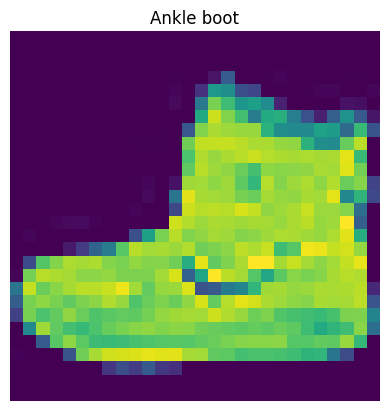

In [37]:
plt.imshow(image.squeeze())
plt.title(f"{train_data.classes[label]}")
plt.axis('off')

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

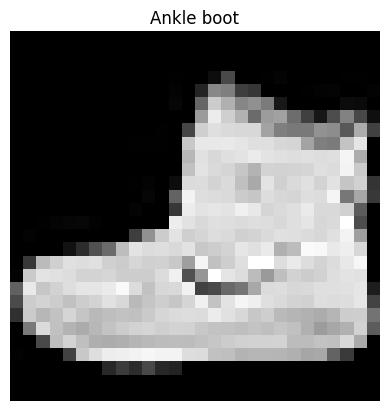

In [36]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(f"{train_data.classes[label]}")
plt.axis('off')

Random images

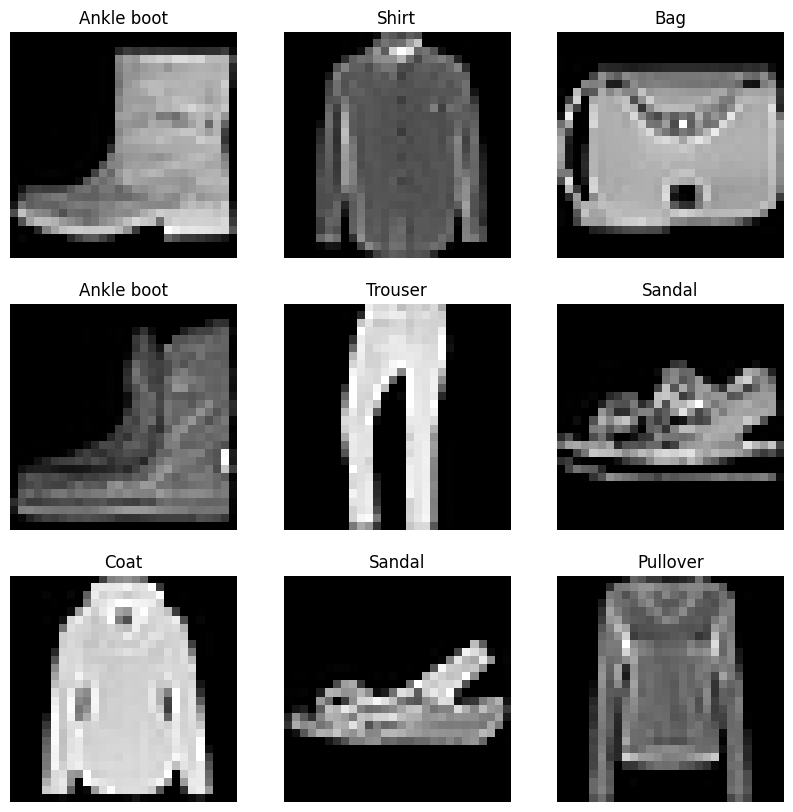

In [44]:
row=3
col=3
torch.manual_seed(42)

plt.figure(figsize=(10,10))

for i in range(1,row*col+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()

    img,label=train_data[random_idx]
    plt.subplot(row,col,i)
    plt.title(f"{train_data.classes[label]}")
    plt.imshow(img.squeeze(),cmap="gray")
    plt.axis('off')
